# Imports

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/DSO_464_Fall_2024/16_Final_(Take_Home)/Data/'

In [ ]:
# Fix some hyperparameters for image configurations
IMAGE_SIZE = 150
BATCH_SIZE = 32

In [ ]:
# Define a path to the dataset directories
## You may need to change them depending on where you are storing the data.

train_data_path = os.path.join(data_path, 'seg_train')
validation_data_path = os.path.join(data_path, 'seg_test')

In [ ]:
# Define ImageDataGenerators for training data
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
    )

# Load images from the directories
train_generator = train_data_gen.flow_from_directory(
    train_data_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
    )

########################################################################################################################################
########################################################################################################################################

# Define ImageDataGenerators for validation data
val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.1
    )


# Load images from the directories
validation_generator = val_data_gen.flow_from_directory(
    validation_data_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
    )

Found 1402 images belonging to 6 classes.
Found 298 images belonging to 6 classes.


In [ ]:
#creating CNN to classify images

In [ ]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D,
                        kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    DefaultConv2D(filters=64, kernel_size=8),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=len(train_generator.class_indices), activation="softmax")
])

model_cnn.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

In [ ]:
# Train the model using this training loop configuration
history = model_cnn.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # total train images // BATCH_SIZE
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)  # total validation images // BATCH_SIZE
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 578s 10s/step - accuracy: 0.1711 - loss: 2.6880 - val_accuracy: 0.3289 - val_loss: 1.7055
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


44/44 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.2768 - loss: 1.7133 - val_accuracy: 0.3624 - val_loss: 1.5785
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.2779 - loss: 1.6859 - val_accuracy: 0.3255 - val_loss: 1.5976
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.3361 - loss: 1.6119 - val_accuracy: 0.3490 - val_loss: 1.5434
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step - accuracy: 0.3399 - loss: 1.5888 - val_accuracy: 0.5101 - val_loss: 1.4008
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5150 - loss: 1.3842
Validation Loss: 1.4008246660232544
Validation Accuracy: 0.5100671052932739


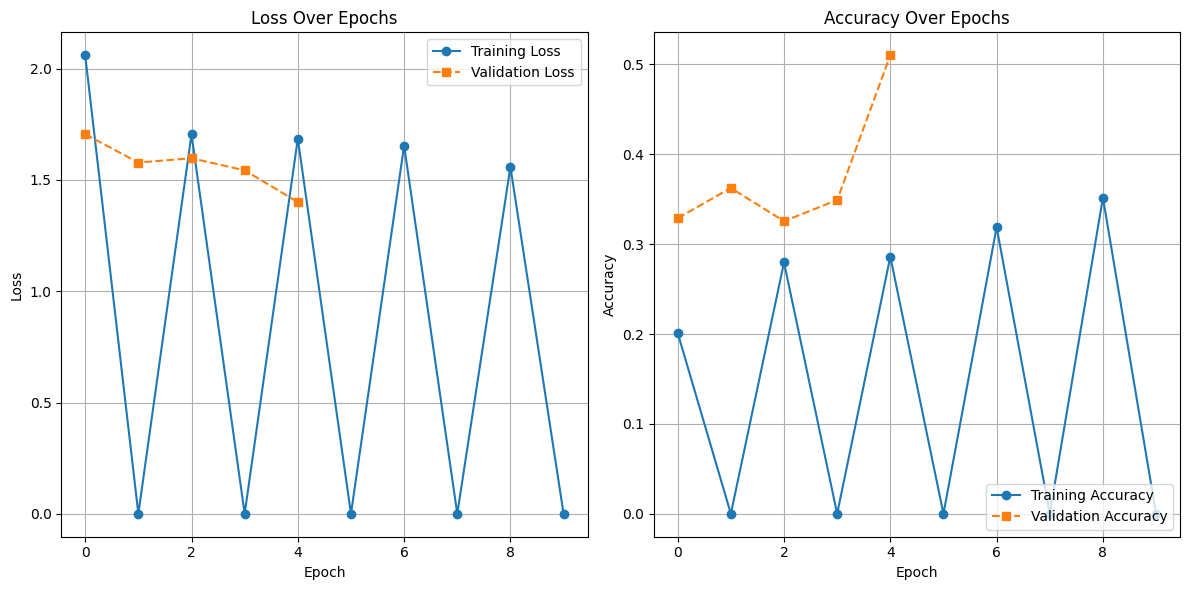

In [ ]:
val_loss, val_accuracy = model_cnn.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='s')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='s')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
#using ResNet-50 Model embeddings to classify images

In [ ]:
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
)

for layers in base_model.layers:
  layers.trainable = False

  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(units=len(train_generator.class_indices), activation="softmax")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model using this training loop configuration
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # total train images // BATCH_SIZE
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)  # total validation images // BATCH_SIZE
)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 582s 12s/step - accuracy: 0.2080 - loss: 5.6561 - val_accuracy: 0.1745 - val_loss: 4.0250
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 535s 12s/step - accuracy: 0.4252 - loss: 2.9559 - val_accuracy: 0.1779 - val_loss: 4.4778
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 533s 12s/step - accuracy: 0.4784 - loss: 2.9042 - val_accuracy: 0.1711 - val_loss: 6.3120
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 562s 12s/step - accuracy: 0.5330 - loss: 2.2984 - val_accuracy: 0.2047 - val_loss: 5.6439
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 562s 12s/step - accuracy: 0.5646 - loss: 2.0519 - val_accuracy: 0.2416 - val_loss: 4.8958
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2582 - loss: 4.9316
Validation Loss: 4.895796298980713
Validation Accuracy: 0.24161073565483093


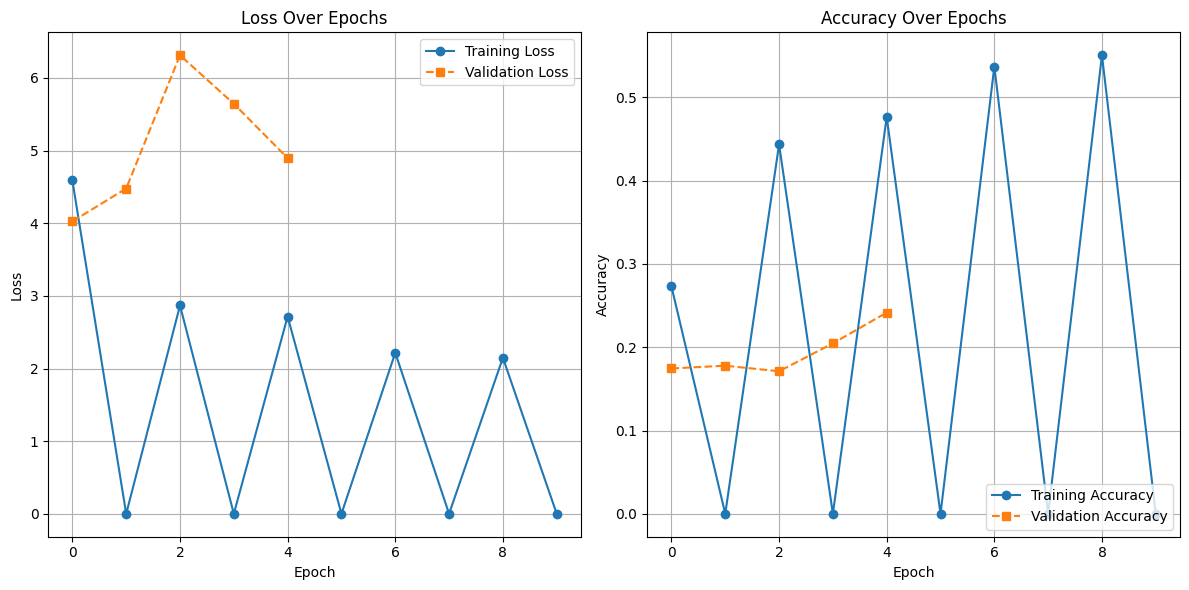

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='s')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='s')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
#Fine-tuning the pre-trained model

In [ ]:
for layer in base_model.layers[:35]:
    layer.trainable = False
for layer in base_model.layers[35:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model using this training loop configuration
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # total train images // BATCH_SIZE
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)  # total validation images // BATCH_SIZE
)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 533s 12s/step - accuracy: 0.5522 - loss: 1.8965 - val_accuracy: 0.2685 - val_loss: 4.7588
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 562s 12s/step - accuracy: 0.5741 - loss: 1.8581 - val_accuracy: 0.3154 - val_loss: 4.0981
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 527s 12s/step - accuracy: 0.5990 - loss: 1.7118 - val_accuracy: 0.3792 - val_loss: 3.3074
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 568s 12s/step - accuracy: 0.6097 - loss: 1.6198 - val_accuracy: 0.4631 - val_loss: 3.0275
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 532s 12s/step - accuracy: 0.5954 - loss: 1.6839 - val_accuracy: 0.5101 - val_lo

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5044 - loss: 2.2860
Validation Loss: 2.2848684787750244
Validation Accuracy: 0.5100671052932739


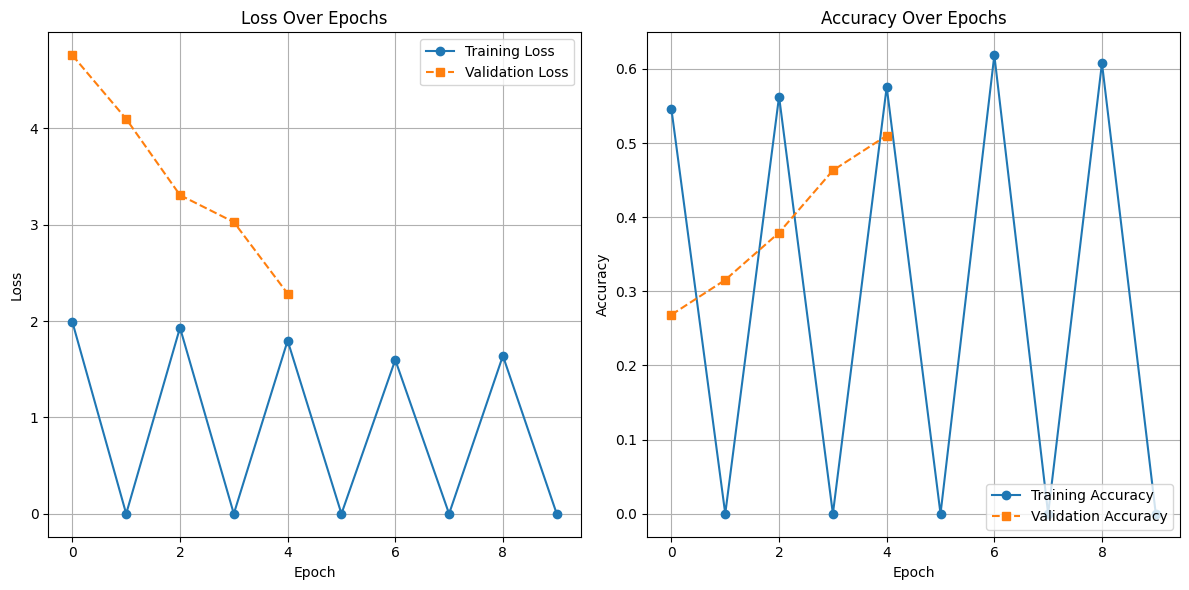

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='s')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='s')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


My custom CNN model had a validation loss of 1.4 and an accuracy of 0.51. My resnet 50 model had a validation loss of 4.9 and an accuracy of 0.24. Lastly, my fine-tuned resnet 50 model had a validation loss of 2.2 and an accuracy of 0.51. My CNN model seemed to do the best, most likely because it was tailored to the dataset as compared to the Resnet50 model. My Resnet50 finetuned model did better than my regular resnet50 model because it was tuned better to the data, but still not as good as the CNN model.

In [ ]:
#balancing the weights on my CNN model to help it perform better

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

for layer in base_model.layers[:140]:
    layer.trainable = False
for layer in base_model.layers[140:]:
    layer.trainable = True

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(units=len(train_generator.class_indices), activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

balance_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(balance_weights))

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    class_weight=class_weights,
)

eval_loss, eval_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {eval_loss}")
print(f"Validation Accuracy: {eval_accuracy}")

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 301s 6s/step - accuracy: 0.2074 - loss: 6.5928 - val_accuracy: 0.4060 - val_loss: 5.9663
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 271s 6s/step - accuracy: 0.3741 - loss: 6.1241 - val_accuracy: 0.5302 - val_loss: 5.7300
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 324s 6s/step - accuracy: 0.4550 - loss: 5.8680 - val_accuracy: 0.6007 - val_loss: 5.6289
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 278s 6s/step - accuracy: 0.5163 - loss: 5.7634 - val_accuracy: 0.6275 - val_loss: 5.5699
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.5476 - loss: 5.6821 - val_accuracy: 0.6443 - val_loss: 5.5218
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 278s 6s/step - accuracy: 0.5355 - loss: 5.6698 - val_accuracy: 0.6409 - val_loss: 5.4411
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 323s 6s/step - accuracy: 0.5575 - loss: 5.5926 - val_accuracy: 0.6644 - val_loss: 5.3974
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 331s 6s/step - accuracy: 0.5833 - loss: 5.5458 - val_accuracy: 0.6779 - v

$\rule{800pt}{20pt}$

$\rule{800pt}{20pt}$

# Transformer Networks

- This exercise will be centered around <b>text classification</b> for sentiment analysis.

  - You will need to use Hugging Face's transformers library to access pre-trained models.

  - We will use the <i>"emotion"</i> dataset from Huggingface and classify tweets based on emotion.

- <b>There may be some things you need to look-up on your own.</b>

---
---

In [ ]:
#text classification for sentiment analysis, using tweets. I used the emotion dataset from the Hugging Face datasets package

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import datasets

emotions = datasets.load_dataset("emotion")

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_ds = emotions["train"]

In [ ]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
# Data analysis
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


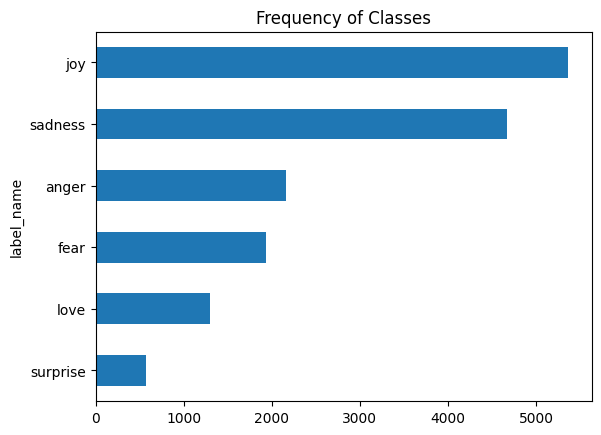

In [ ]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

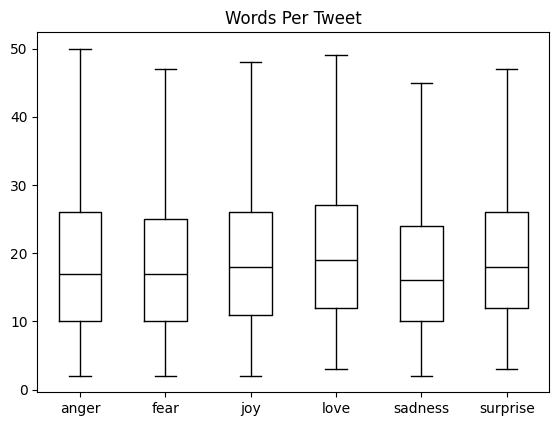

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
emotions.reset_format()

In [ ]:
#tokenizing text data to convert in into machine learnable formate. Used pre-trained Bert-based model and the Transformers AutoTokenizer method

In [ ]:
## Put your tokenizer code here ##

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
## Then run the following cells ##
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
batch_size = 64

tokenizer_columns = tokenizer.model_input_names

train_dataset = emotions_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,
    batch_size=batch_size)

val_dataset = emotions_encoded["validation"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
    batch_size=batch_size)

test_dataset = emotions_encoded["test"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
    batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=6)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/2
250/250 [==============================] - 7708s 31s/step - loss: 3.3238 - accuracy: 0.2914 - val_loss: 3.4736 - val_accuracy: 0.2750
Epoch 2/2
250/250 [==============================] - 7733s 31s/step - loss: 3.2761 - accuracy: 0.2943 - val_loss: 3.4736 - val_accuracy: 0.2750
